In [1]:
import pandas as pd
import numpy as np


In [3]:
msg=pd.read_csv("messages.csv")
msg.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
msg.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
msg.shape

(2893, 3)

In [6]:
msg.drop(columns=['subject'],inplace=True)

In [8]:
msg.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [14]:
print(round(len(msg[msg['label']==0])/len(msg.label),2)*100,'%')
print(round(len(msg[msg['label']==1])/len(msg.label),2)*100,'%')

83.0 %
17.0 %


In [16]:
msg['message'][1]

'lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of language family . the language family index facilitates locating language names in the ethnologue , making the data there more accessible . internet : academic . books @ sil . org languages , reference lang & culture gregerson , marilyn ; ritual , belief , and kinship in sulawesi ; pb . : isbn : 0-88312 - 621 - 4 ; ix , 194 pp . ; $ 25 . 00 . summer institute of linguistics . seven articles discuss five language groups in sulawesi , indonesia ; the primary focus is on cultural matters , with some linguistic content . topics include traditional religion and beliefs , certain ceremonies , and kinship . 

In [18]:
msg['message']=msg['message'].str.lower()

0       content - length : 3386 apple-iss research cen...
1       lang classification grimes , joseph e . and ba...
2       i am posting this inquiry for sergei atamas ( ...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by ! ! we have taken...
2889    the list owner of : " kiddin " has invited you...
2890    judging from the return post , i must have sou...
2891    gotcha ! there are two separate fallacies in t...
2892    hello ! i ' m working on a thesis concerning a...
Name: message, Length: 2893, dtype: object

In [19]:
msg['message'] = msg['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
msg['message'] = msg['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
msg['message'] = msg['message'].str.replace(r'£|\$', 'dollers')
msg['message'] = msg['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
msg['message'] = msg['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [20]:
msg['message'] = msg['message'].str.replace(r'[^\w\d\s]', ' ')
msg['message'] = msg['message'].str.replace(r'\s+', ' ')
msg['message'] = msg['message'].str.replace(r'^\s+|\s+?$', '')

In [21]:
msg['message'].head()

0    content length numbr apple iss research center...
1    lang classification grimes joseph e and barbar...
2    i am posting this inquiry for sergei atamas sa...
3    a colleague and i are researching the differin...
4    earlier this morning i was on the phone with a...
Name: message, dtype: object

In [25]:
import nltk
from nltk.corpus import stopwords

stop_words= nltk.corpus.stopwords.words('english')

In [26]:
msg['message']=msg['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [28]:
msg['lenght']=msg.message.str.len()

In [30]:
msg.head()

,message,label,lenght
0,content length numbr apple iss research center...,0,2179
1,lang classification grimes joseph e barbara f ...,0,1454
2,posting inquiry sergei atamas satamas umabnet ...,0,1064
3,colleague researching differing degrees risk p...,0,210
4,earlier morning phone friend mine living south...,0,629


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

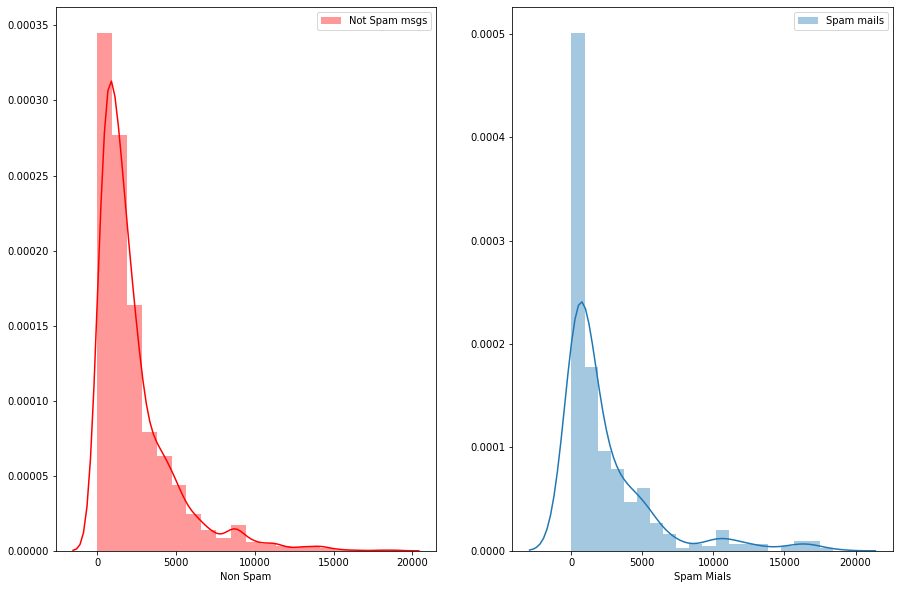

In [40]:
f,ax= plt.subplots(1,2,figsize=(15,10))
sns.distplot(msg[msg['label']==0]['lenght'],bins=20,ax=ax[0],label='Not Spam msgs',color='r')
ax[0].set_xlabel('Non Spam')
ax[0].legend()

sns.distplot(msg[msg['label']==1]['lenght'],bins=20,ax=ax[1],label='Spam mails')
ax[1].set_xlabel('Spam Mials')
ax[1].legend()

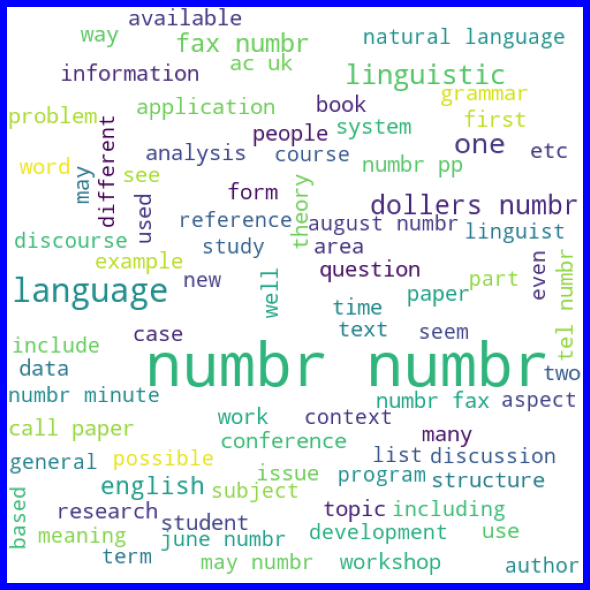

In [99]:
from wordcloud import WordCloud

mails=msg['message'][msg['label']==0]
mail_cloud=WordCloud(width=500,height=500,background_color='white',max_words=80).generate(' '.join(mails))
plt.figure(figsize=(8,8),facecolor='b')
plt.imshow(mail_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

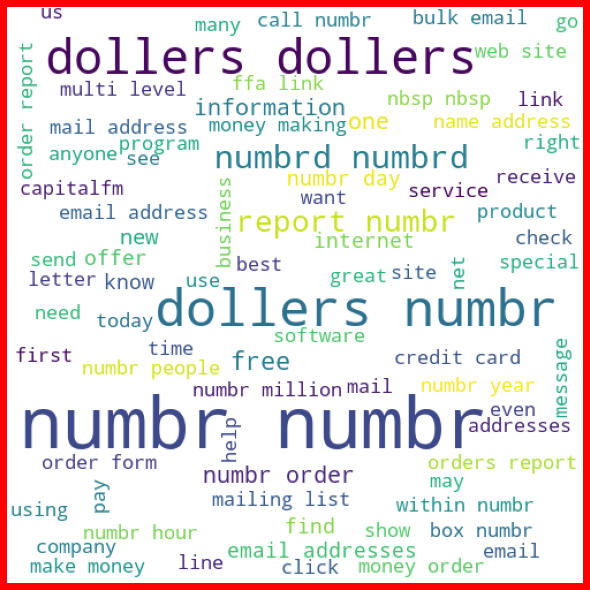

In [100]:
spams=msg['message'][msg['label']==1]
spam_cloud=WordCloud(width=500,height=500,background_color='white',max_words=80).generate(' '.join(spams))
plt.figure(figsize=(8,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

Accuracy of the model: 0.8646408839779005
Classification report :               precision    recall  f1-score   support

           0       0.86      1.00      0.93       610
           1       1.00      0.14      0.25       114

    accuracy                           0.86       724
   macro avg       0.93      0.57      0.59       724
weighted avg       0.88      0.86      0.82       724

Confussion matrix: [[610   0]
 [ 98  16]]


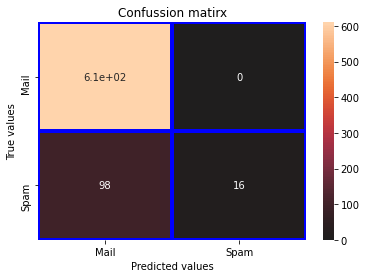

In [43]:
tfvd=TfidfVectorizer()
multi=MultinomialNB()

X=msg['message']

feature=tfvd.fit_transform(X)
x=feature
y=msg['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
multi.fit(x_train,y_train)
ypred=multi.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['Mail','Spam'])
ax.yaxis.set_ticklabels(['Mail','Spam'])
plt.show()

Accuracy of the model: 0.9475138121546961
Classification report :               precision    recall  f1-score   support

           0       0.94      1.00      0.97       585
           1       0.99      0.73      0.84       139

    accuracy                           0.95       724
   macro avg       0.97      0.87      0.91       724
weighted avg       0.95      0.95      0.94       724

Confussion matrix: [[584   1]
 [ 37 102]]


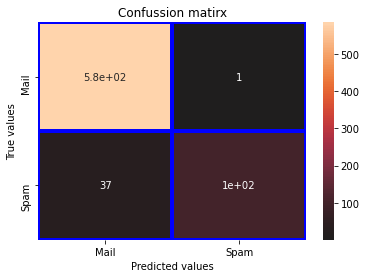

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['Mail','Spam'])
ax.yaxis.set_ticklabels(['Mail','Spam'])
plt.show()

Accuracy of the model: 0.9585635359116023
Classification report :               precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.94      0.83      0.89       139

    accuracy                           0.96       724
   macro avg       0.95      0.91      0.93       724
weighted avg       0.96      0.96      0.96       724

Confussion matrix: [[578   7]
 [ 23 116]]


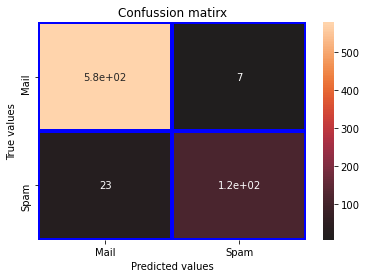

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
dtc.fit(x_train,y_train)
ypred=dtc.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['Mail','Spam'])
ax.yaxis.set_ticklabels(['Mail','Spam'])
plt.show()


Accuracy of the model: 0.9765193370165746
Classification report :               precision    recall  f1-score   support

           0       0.98      0.99      0.99       585
           1       0.96      0.92      0.94       139

    accuracy                           0.98       724
   macro avg       0.97      0.96      0.96       724
weighted avg       0.98      0.98      0.98       724

Confussion matrix: [[579   6]
 [ 11 128]]


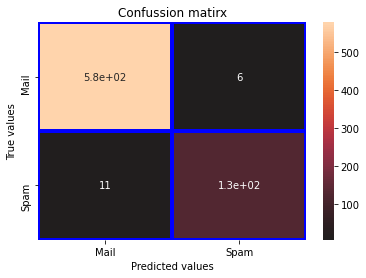

In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
kn.fit(x_train,y_train)
ypred=kn.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['Mail','Spam'])
ax.yaxis.set_ticklabels(['Mail','Spam'])
plt.show()

In [47]:
import joblib
joblib.dump(kn,'NLP_Project2')

['NLP_Project2']

In [54]:
msg_new=msg.groupby('label').agg({'message':', '.join})
msg_new

,message
label,
0,content length numbr apple iss research center...
1,multi part message mime format _ nextpart _ nu...


In [58]:
mail=msg_new.message[0]
spam=msg_new.message[1]

In [60]:
import gensim

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [64]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [78]:
mailn=mail.split(' ')
print(mailn)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
words=[]
for word in mail.split(' '):
    words.append(preprocess(word))

In [81]:
len(words)

771018

In [88]:
dictionary = gensim.corpora.Dictionary(words)

In [89]:
print (dictionary)

Dictionary(37166 unique tokens: ['content', 'length', 'numbr', 'appl', 'research']...)


In [90]:
dictionary.filter_extremes(no_below=15,no_above=0.1,keep_n=100000)
print (dictionary)

Dictionary(3910 unique tokens: ['content', 'length', 'numbr', 'appl', 'research']...)


In [94]:
words1=[]
for word in spam.split(' '):
    words1.append(preprocess(word))
print(len(words))
dictionary = gensim.corpora.Dictionary(words1)
print (dictionary)
dictionary.filter_extremes(no_below=15,no_above=0.1,keep_n=100000)
print (dictionary)

771018
Dictionary(6897 unique tokens: ['multi', 'messag', 'mime', 'format', 'nextpart']...)
Dictionary(1164 unique tokens: ['multi', 'messag', 'format', 'numbr', 'content']...)
